In [2]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  error: subprocess-exited-with-error
  
  × Running setup.py install for tensorflow-gpu did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install for tensorflow-gpu ... error
error: legacy-install-failure

× Encountered error while trying to install package.
╰─> tensorflow-gpu

note: This is an issue with the package mentioned above, not pip.
hint: See above for outpu

In [3]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
import cv2
import imghdr

In [6]:
data_dir = '/content/drive/My Drive/cancerdata'
os.listdir(data_dir)

['benign', 'malignant']

In [7]:
image_exts = ['png']

In [8]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
    except Exception as e:
      print('Issue with image {}'.format(image_path))

In [9]:
# tf.data.Dataset??

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/My Drive/cancerdata')

Found 1312 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

In [14]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [15]:
batch[1]

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int32)

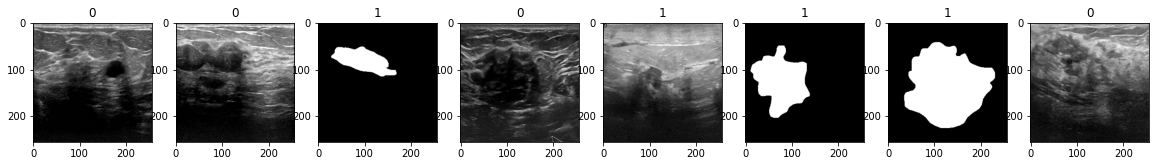

In [16]:
# Show which label for which (0:B , 1:M, 2:N)
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [17]:
# Preprocess data
data = data.map(lambda x, y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [18]:
scaled_iterator = data.as_numpy_iterator()

In [19]:
batch = scaled_iterator.next()

In [20]:
batch[0].max()

1.0

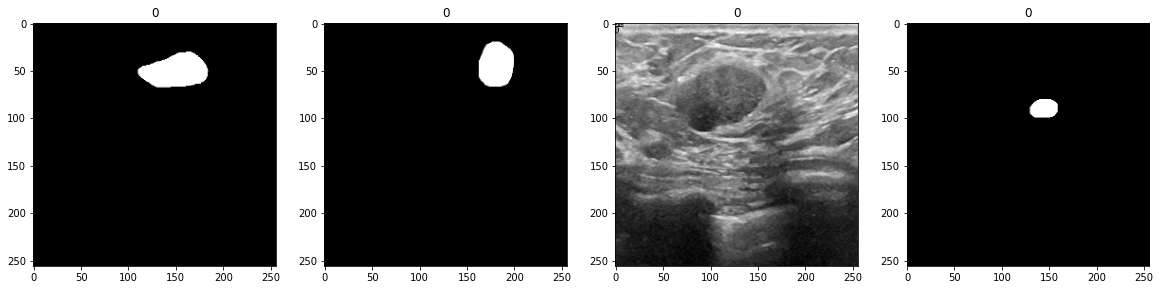

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [22]:
# Split data
len(data)

41

In [23]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [24]:
train_size

28

In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In [26]:
len(val)

8

In [27]:
# Deep model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [32]:
# Train
logdir = 'logs'

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
28/28 [==============================] - 24s 428ms/step - loss: 0.7423 - accuracy: 0.5938 - val_loss: 0.6275 - val_accuracy: 0.6953
Epoch 2/20
28/28 [==============================] - 13s 440ms/step - loss: 0.5755 - accuracy: 0.6908 - val_loss: 0.5224 - val_accuracy: 0.7812
Epoch 3/20
28/28 [==============================] - 17s 588ms/step - loss: 0.4069 - accuracy: 0.8058 - val_loss: 0.4930 - val_accuracy: 0.7773
Epoch 4/20
28/28 [==============================] - 14s 476ms/step - loss: 0.2985 - accuracy: 0.8839 - val_loss: 0.5062 - val_accuracy: 0.8164
Epoch 5/20
28/28 [==============================] - 13s 441ms/step - loss: 0.2153 - accuracy: 0.9208 - val_loss: 0.4284 - val_accuracy: 0.8633
Epoch 6/20
28/28 [==============================] - 13s 396ms/step - loss: 0.1514 - accuracy: 0.9453 - val_loss: 0.4022 - val_accuracy: 0.8789
Epoch 7/20
28/28 [==============================] - 13s 414ms/step - loss: 0.1137 - accuracy: 0.9609 - val_loss: 0.4719 - val_accuracy: 0.8477

In [ ]:
hist.history

In [ ]:
model.evaluate(test, verbose=0)

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Evaluate
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 43ms/step


In [ ]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.75, Recall:0.782608687877655, Accuracy:0.862500011920929


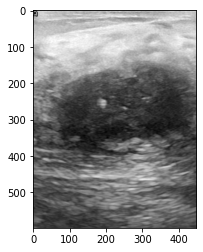

In [ ]:
# Test
img = cv2.imread('/content/drive/My Drive/cancerdata/malignant/malignant (1).png')
plt.imshow(img)
plt.show()

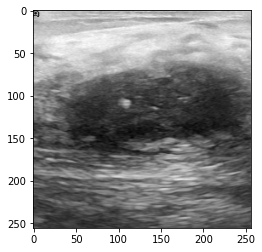

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
result = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 169ms/step


In [ ]:
result

array([[0.99841297]], dtype=float32)

In [ ]:
if result > 0.5:
  print(f'Predicted class is Malignant.\nMalignant the tumors are cancerous. The cells can grow and spread to other parts of the body.')
else:
  print(f'Predicted class is Benign.\nBenign the cells are not yet cancerous, but they have the potential to become malignant consult the doctor')

Predicted class is Malignant.
Malignant the tumors are cancerous. The cells can grow and spread to other parts of the body.


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('cancer_cnn_model.h5')

In [ ]:
new_model = load_model('cancer_cnn_model.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 94ms/step


array([[0.99841297]], dtype=float32)